[Reference](https://medium.com/ai-techsystems/credit-card-fraud-detection-using-deep-learning-d8c0940bd117)

In [1]:
!wget -N "https://cainvas-static.s3.amazonaws.com/media/user_data/DheerajPeru/creditcard.csv.zip"
!unzip -o "creditcard.csv.zip" 
!rm "creditcard.csv.zip"

--2021-12-05 06:38:02--  https://cainvas-static.s3.amazonaws.com/media/user_data/DheerajPeru/creditcard.csv.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.158.51
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.158.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69155672 (66M) [application/x-zip-compressed]
Saving to: ‘creditcard.csv.zip’

creditcard.csv.zip  100%[===================>]  65.95M  12.7MB/s    in 6.6s    

2021-12-05 06:38:10 (9.96 MB/s) - ‘creditcard.csv.zip’ saved [69155672/69155672]

Archive:  creditcard.csv.zip
  inflating: creditcard.csv          


In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler    # in order to scale data
from sklearn.metrics import classification_report,accuracy_score


import warnings as wr
wr.filterwarnings("ignore")

data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.shape

(284807, 31)

In [8]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

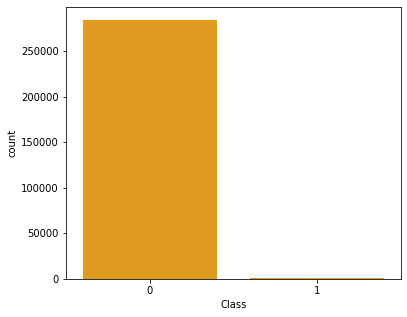

In [11]:
plt.figure(figsize = (6,5))
sns.countplot(data.Class, color = "orange")
plt.show()

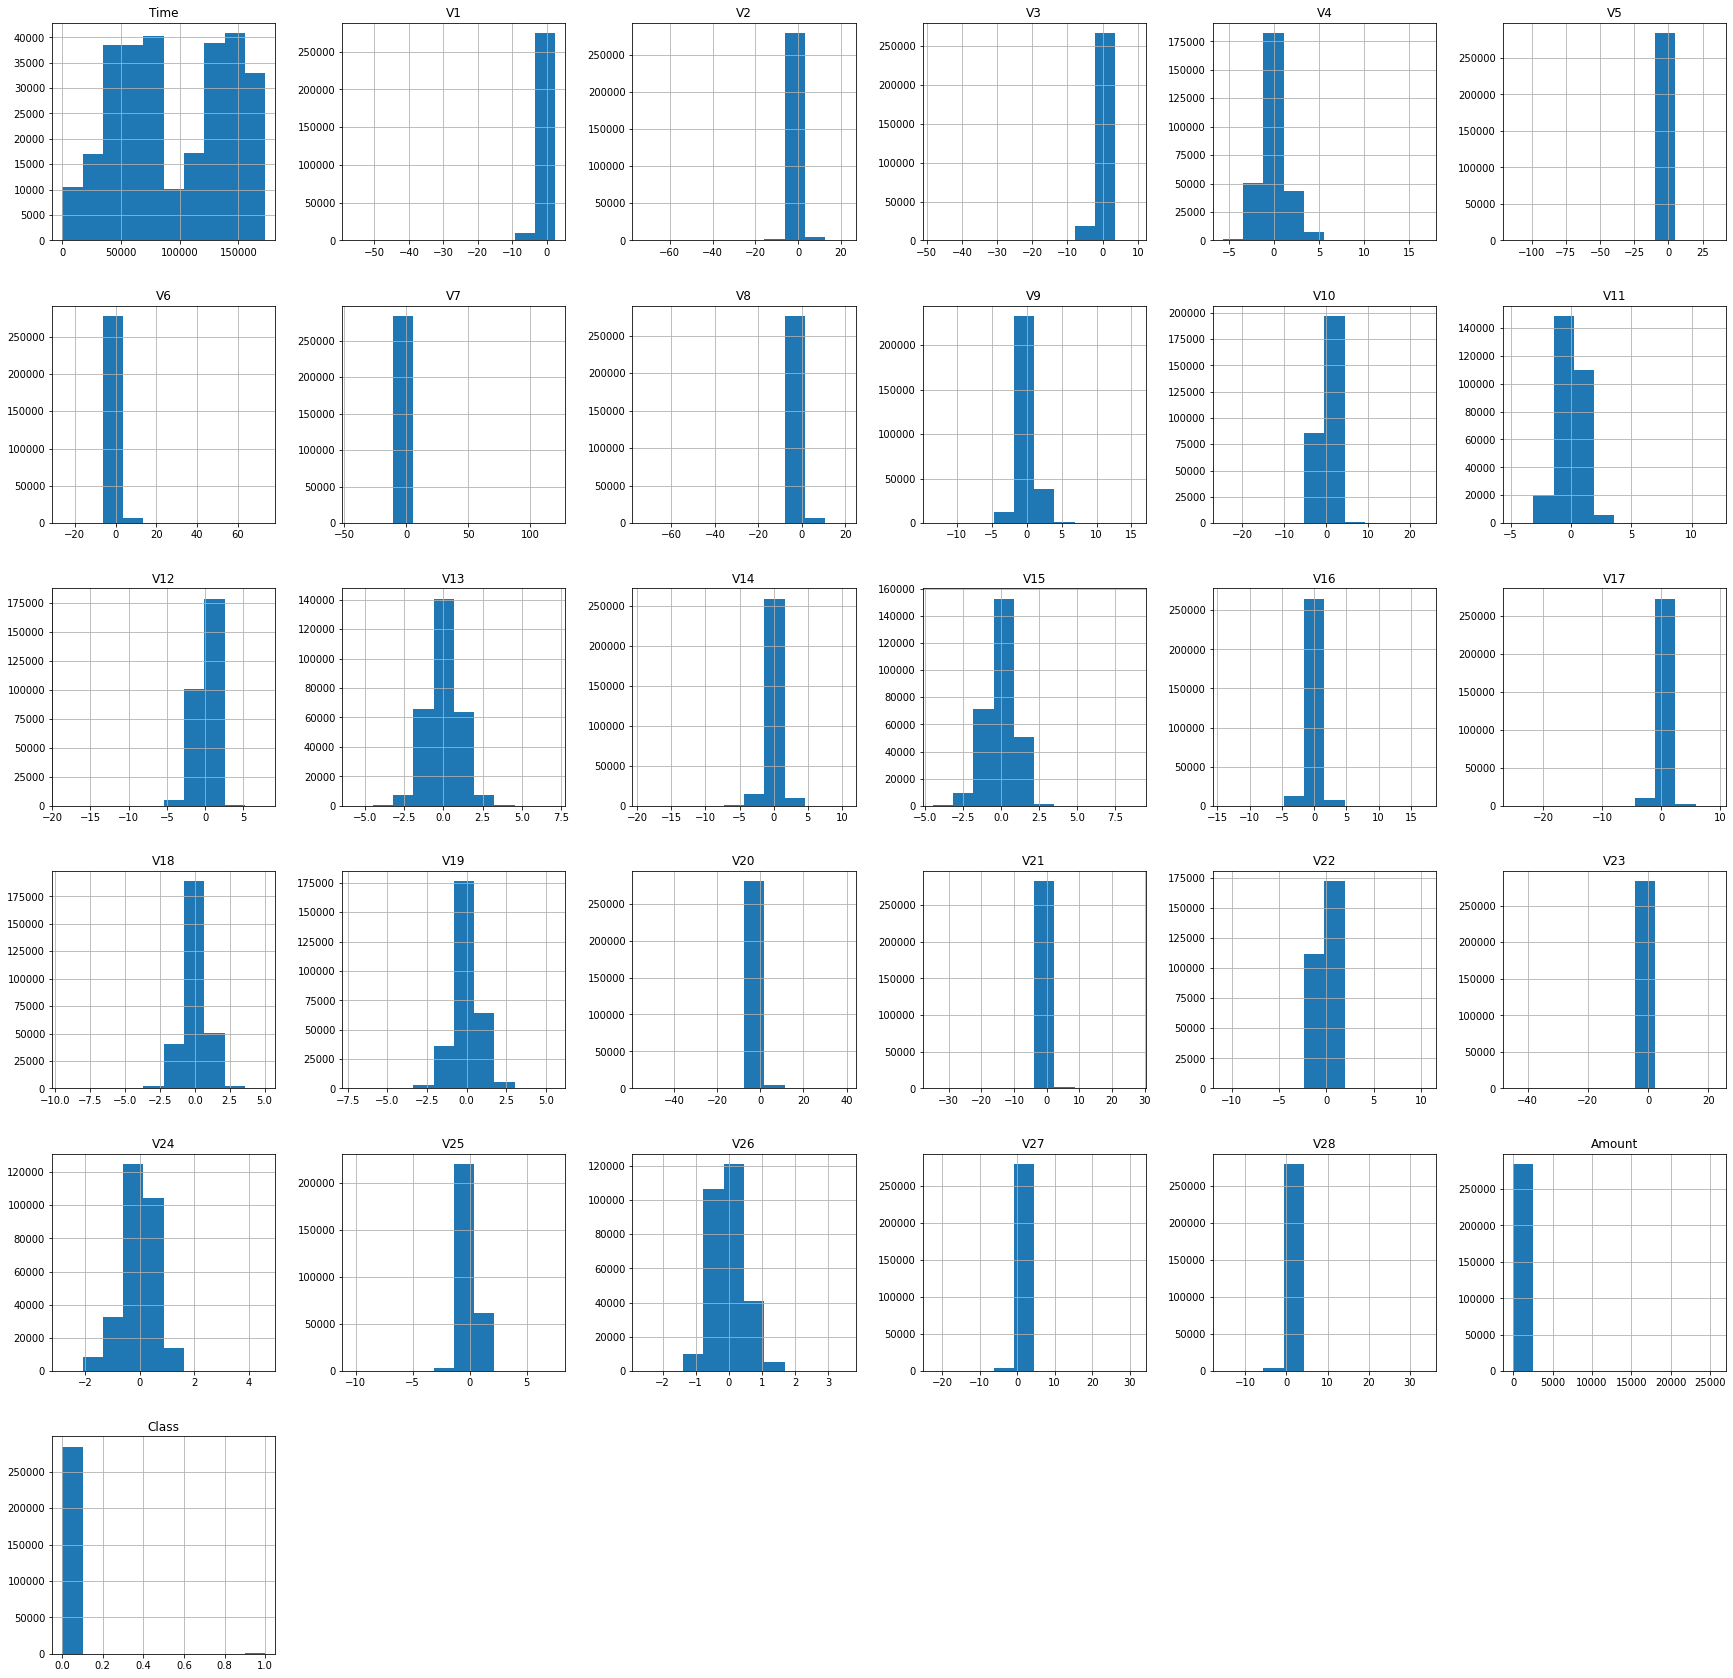

In [12]:
data.hist(figsize=(30,30))
plt.show()

In [3]:
fraud = data[data.Class == 1]
non_fraud = data[data.Class == 0]
non_fraud_balanced = non_fraud.sample(4000)
balanced_data = fraud.append(non_fraud_balanced, ignore_index = True)

In [13]:
print("Shape of fraud data:", fraud.shape)
print("Shape of non-fraus data:", non_fraud.shape)

Shape of fraud data: (492, 31)
Shape of non-fraus data: (284315, 31)


In [14]:
balanced_data.Class.value_counts()

0    4000
1     492
Name: Class, dtype: int64

In [15]:
x = balanced_data.drop("Class", axis = 1)
x # dataset without Class column

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,171769.0,-1.074237,-0.780975,0.923050,-2.200484,1.714383,-0.559763,0.140150,-0.183681,-1.744104,0.288242,0.516415,-0.347462,0.771737,-0.258500,-0.537614,1.157537,-0.512536,-0.436768,0.932470,0.578932,0.496835,1.145234,-0.517047,0.167682,1.114862,0.153041,-0.220888,-0.175295,26.80
4488,35590.0,-0.906632,0.368481,0.545909,-1.569433,-0.415392,-0.714339,-0.211570,0.469389,-1.303686,-0.427564,0.684669,-0.617404,-0.962032,-0.842114,-1.247908,1.722871,0.872094,-0.405882,0.502575,-0.103449,0.120510,0.027605,-0.106645,-0.093293,-0.292876,-0.531243,-0.117769,0.070405,25.08
4489,56517.0,-0.783206,1.451591,1.783048,0.899246,0.454766,-0.508260,1.299306,-0.932811,0.109709,1.426447,0.091288,0.283417,1.306484,-0.834872,1.282425,-0.662684,-0.550781,-0.175652,0.656213,0.507353,-0.100581,0.365170,-0.176064,0.413981,-0.245319,-0.469345,-0.493530,-0.403436,1.98
4490,139276.0,0.045971,0.900683,0.308123,-0.587793,0.443676,-1.123315,1.036177,-0.231606,-0.108139,-0.422020,-0.846927,0.364826,0.429358,0.028937,-0.450226,-0.115898,-0.429291,-0.803549,-0.089773,-0.014980,-0.255895,-0.535164,0.062542,0.051093,-0.476757,0.136370,0.250408,0.098317,1.79


In [16]:
y = balanced_data.Class
y

0       1
1       1
2       1
3       1
4       1
       ..
4487    0
4488    0
4489    0
4490    0
4491    0
Name: Class, Length: 4492, dtype: int64

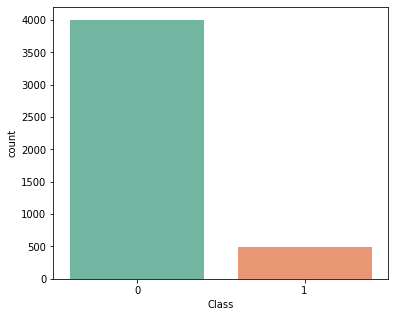

In [17]:
plt.figure(figsize = (6,5))
sns.countplot(y, palette="Set2")
plt.show()

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_xtrain = scaler.fit_transform(xtrain)
scaled_xtest = scaler.fit_transform(xtest)

In [21]:
print(scaled_xtrain.shape)
print(scaled_xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3593, 30)
(899, 30)
(3593,)
(899,)


In [22]:
scaled_xtrain3d = scaled_xtrain.reshape(scaled_xtrain.shape[0],scaled_xtrain.shape[1],1)
scaled_xtest3d = scaled_xtest.reshape(scaled_xtest.shape[0],scaled_xtest.shape[1],1)

scaled_xtrain3d.shape, scaled_xtest3d.shape

((3593, 30, 1), (899, 30, 1))

In [23]:
# First Layer:

cnn = Sequential()
cnn.add(Conv1D(32, 2, activation = "relu", input_shape = (30,1)))
cnn.add(Dropout(0.1))

# Second Layer:

cnn.add(BatchNormalization()) # Batch normalization is a technique for training very deep neural networks 
                               # that standardizes the inputs to a layer for each mini-batch. This 
                               # has the effect of stabilizing the learning process and dramatically
                               # reducing the number of training epochs required to train deep networks

cnn.add(Conv1D(64, 2, activation = "relu"))
cnn.add(Dropout(0.2))          # prevents over-fitting (randomly remove some neurons)

# Flattening Layer:

cnn.add(Flatten())
cnn.add(Dropout(0.4))
cnn.add(Dense(64, activation = "relu"))
cnn.add(Dropout(0.5))

# Last Layer:

cnn.add(Dense(1, activation = "sigmoid"))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 batch_normalization (BatchN  (None, 29, 32)           128       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0         
                                                                 
 flatten (Flatten)           (None, 1792)              0         
                                                        

In [24]:
cnn.compile(optimizer = Adam(lr=0.0001), loss = "binary_crossentropy", metrics = ["accuracy"])

In [25]:
history = cnn.fit(scaled_xtrain3d, ytrain, epochs = 20, validation_data=(scaled_xtest3d, ytest), verbose=1)

Epoch 1/20
113/113 [==============================] - 2s 10ms/step - loss: 0.2615 - accuracy: 0.9171 - val_loss: 0.3282 - val_accuracy: 0.9789
Epoch 2/20
113/113 [==============================] - 1s 8ms/step - loss: 0.1318 - accuracy: 0.9672 - val_loss: 0.1600 - val_accuracy: 0.9833
Epoch 3/20
113/113 [==============================] - 1s 8ms/step - loss: 0.1133 - accuracy: 0.9738 - val_loss: 0.0913 - val_accuracy: 0.9855
Epoch 4/20
113/113 [==============================] - 1s 8ms/step - loss: 0.1124 - accuracy: 0.9713 - val_loss: 0.0720 - val_accuracy: 0.9855
Epoch 5/20
113/113 [==============================] - 1s 8ms/step - loss: 0.1002 - accuracy: 0.9763 - val_loss: 0.0692 - val_accuracy: 0.9889
Epoch 6/20
113/113 [==============================] - 1s 8ms/step - loss: 0.0919 - accuracy: 0.9786 - val_loss: 0.0683 - val_accuracy: 0.9889
Epoch 7/20
113/113 [==============================] - 1s 8ms/step - loss: 0.0875 - accuracy: 0.9777 - val_loss: 0.0680 - val_accuracy: 0.9900
Epoch

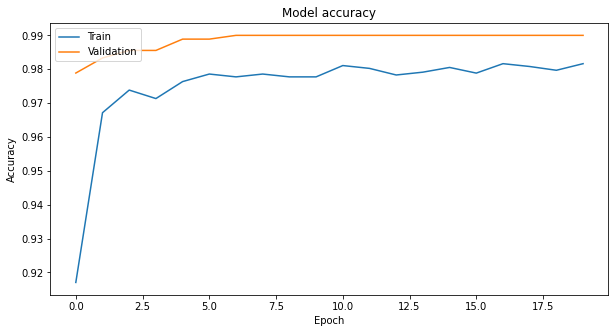

In [26]:
fig, ax1 = plt.subplots(figsize= (10, 5))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc = "upper left")
plt.show()

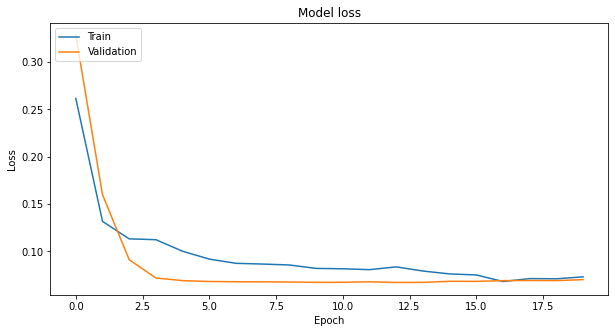

In [27]:
fig, ax1 = plt.subplots(figsize= (10, 5))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc = "upper left")
plt.show()

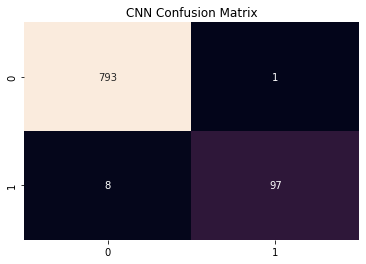

In [32]:
from sklearn.metrics import confusion_matrix

cnn_predictions = (cnn.predict(scaled_xtest3d) > 0.5).astype("int32")

confusion_matrix = confusion_matrix(ytest, cnn_predictions)
sns.heatmap(confusion_matrix, annot=True, fmt="d", cbar = False)
plt.title("CNN Confusion Matrix")
plt.show()

In [33]:
accuracy_score(ytest, cnn_predictions)

0.9899888765294772

In [34]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(ytest, cnn_predictions)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.99001248 0.98979592]
recall: [0.99874055 0.92380952]
fscore: [0.99435737 0.95566502]
support: [794 105]


In [35]:
cnn.save('fraud_detection_model.h5')

In [37]:
# !deepCC fraud_detection_model.h5